In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
# The simulation is based on the following:
# A number of people are moving randomly in specified square space
# the starting locations of persons are also random
# If in one second, the healthy people is within 1 meter from a contracted person, we randomly decide whether the person is contracted
# Every seconds a person move under a normal distribution of mean=0, standard deviation is specified by user, in meter
# We simulate the changes of location & state of persons every second

class person:
    def __init__(self, dist_room):
        """
        A simulation of a person, containing location & state of health information
        Input: 
            dist_room: How large the space is for the person to move around
        Attributes:
            x:x of coordinate
            y:y of coordinate
            dist_room: the space of room in meter
            covid: whether the person is contracted
        """
        self.x = np.random.uniform(low=0, high=dist_room)
        self.y = np.random.uniform(low=0, high=dist_room)
        self.dist_room = dist_room
        self.covid = 0

    def move(self, dist):
        """
        Let the person "move" one second by changing coordinates, update x & y
        Input: dist: standard deviation of moving per second in a normal distribution
        """
        self.x = max(min(self.x+np.random.normal(scale=dist), 100), 0)
        self.y = max(min(self.y+np.random.normal(scale=dist), 100), 0)

    def covid_judge(self):
        """
        Judge whether the person is contracted in case the contact with contracted patients happens, update covid attribute
        """
        if self.covid == 0:
            self.covid = np.random.choice([0, 1], p=[0.9, 0.1])

    def reset(self):
        """
        Reset the attributes
        """
        self.x = np.random.uniform(low=0, high=dist_room)
        self.y = np.random.uniform(low=0, high=dist_room)
        self.covid = 0

class room:
    def __init__(self, dist_room, guests, init_covid):
        """
        Build the room with specified space, total guests anyd initial total patients
        Input:
            dist_rooms: width of the space, in meter
            guests: total guests at start
            init_covid: total covid patients at start
        Attributes:
            guest_list: the list of Person objects representing person information
            init_covid: total covid patients at start
            guests: total guests at start
            dist_rooms: width of the space, in meter
            total_contracted: the final total patients at the end of simulation
            contracted: list of contracted persons
            healthy: list of healthy persons
        """
        self.guest_list = [person(dist_room) for i in range(guests)]
        for i in range(init_covid):
            self.guest_list[i].covid = 1
        self.init_covid = init_covid
        self.guests = guests
        self.dist_room = dist_room
        self.total_contracted = init_covid
        self.contracted = list(range(self.init_covid))
        self.healthy = list(range(self.init_covid, self.guests))

    def reset(self):
        """
        Reset the attributes
        """
        self.guest_list = [person(self.dist_room) for i in range(self.guests)]
        for i in range(self.init_covid):
            self.guest_list[i].covid = 1
        self.total_contracted = self.init_covid
        self.contracted = list(range(self.init_covid))
        self.healthy = list(range(self.init_covid, self.guests))

    def simu_one_sec(self, dist):
        """
        Simulate the state of persons in this room after one second passes
        If in one second, the healthy people is within 1 meter from a contracted person, we randomly decide whether the person is contracted
        Input: dist: standard deviation of moving per second in a normal distribution
        """
        for j in range(len(self.guest_list)):
            self.guest_list[j].move(dist)
        for l in self.healthy:
            for m in self.contracted:
                if ((self.guest_list[l].x-self.guest_list[m].x)**2+(self.guest_list[l].y-self.guest_list[m].y)**2) < 1:
                    self.guest_list[l].covid_judge()
                if self.guest_list[l].covid == 1:
                    self.healthy.remove(l)
                    self.contracted.append(l)
                    self.total_contracted += 1
                    break

    def simulate(self, dist, time):
        """
        Simulate the state of persons in this room after specified length of time passes
        Input: 
            dist: standard deviation of moving per second in a normal distribution
            time: specified time length
        """
        self.reset()
        for i in range(time):
            self.simu_one_sec(dist)

    def simulate_plot(self, dist, time, interval):
        """
        Simulate the state of persons in this room after specified length of time passes with plots of guest locations & state of health at each interval of time
        Input: 
            dist: standard deviation of moving per second in a normal distribution
            time: specified time length
            interval: the time interval in second between two plots 
        """
        self.reset()
        for i in range(time):
            self.simu_one_sec(dist)
            healthy_x = [self.guest_list[i].x for i in self.healthy]
            healthy_y = [self.guest_list[i].y for i in self.healthy]
            contracted_x = [self.guest_list[i].x for i in self.contracted]
            contracted_y = [self.guest_list[i].y for i in self.contracted]
            if (i+1) % interval == 0:
                plt.figure(figsize=(12, 10))
                plt.plot(healthy_x, healthy_y, 'bo')
                plt.plot(contracted_x, contracted_y, 'ro')
                plt.title('Second = '+str(i))
                plt.show()

    def simulate_trend(self, dist, time, interval):
        """
        Output a list of total contracted people as time develops
        Input: 
            dist: standard deviation of moving per second in a normal distribution
            time: specified time length
            interval: the time interval in second between two consecutive records of total contracted people 
        """
        total_list = []
        self.reset()
        for i in range(time):
            self.simu_one_sec(dist)
            if (i+1) % interval == 0:
                total_list.append(self.total_contracted)
        return total_list

In [98]:
# Build the room object of 100m*100m space, 30 people, 5 contracted at start
# I assume the density becasue the density in Los Angeles is 2,910/square kilometer
simu1=room(100,30,5)

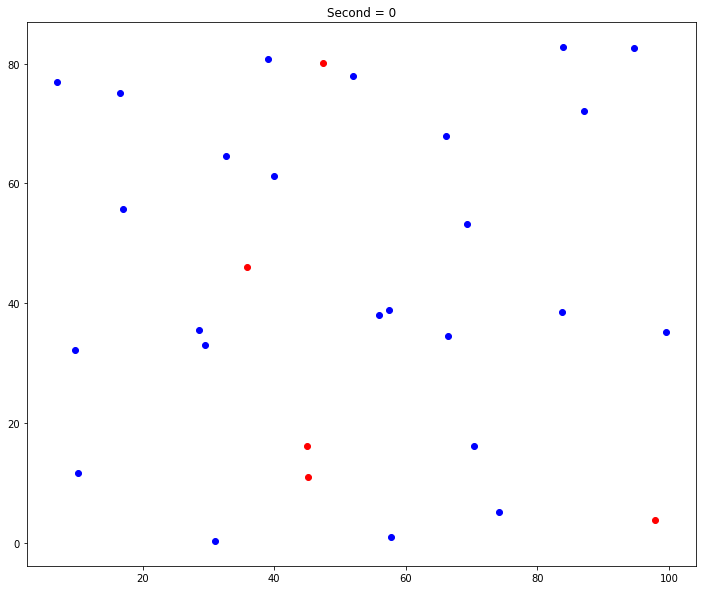

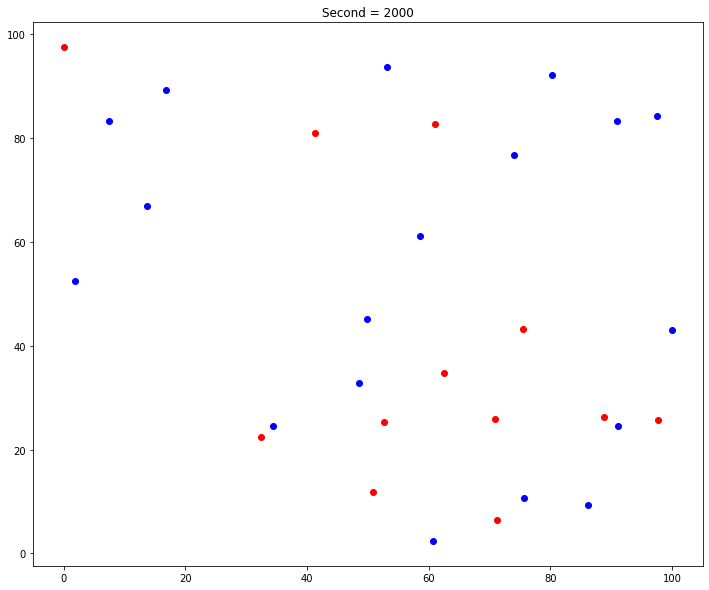

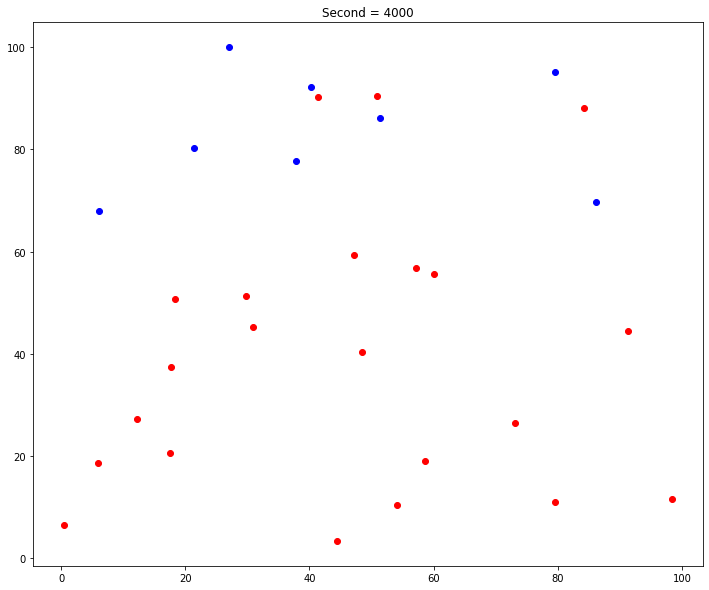

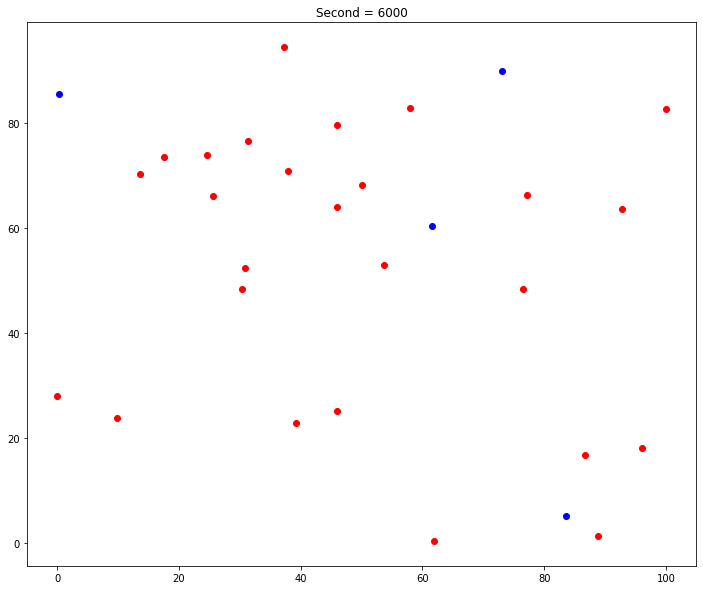

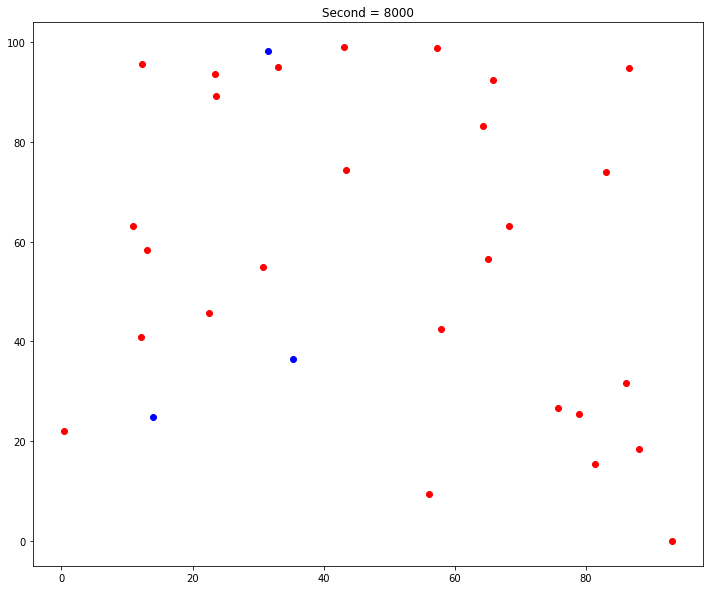

In [69]:
# A change of location & state of 30 people in 100m*100m space, time in 10000 seconds 
# Red is contracted, blue is healthy
simu1.simulate_plot(1,10000,2000)

In [125]:
# we calculate 5 curves of trend with standard deviation of moving distance from 0.2 meter to 1 meter
# each sample 20 times, taking average total contracted people
# time scale is from 0s to 5000s

total1=np.sum(np.array([simu1.simulate_trend(1,5000) for i in range(20)]),axis=0)/20
total_08=np.sum(np.array([simu1.simulate_trend(0.8,5000) for i in range(20)]),axis=0)/20
total_06=np.sum(np.array([simu1.simulate_trend(0.6,5000) for i in range(20)]),axis=0)/20
total_04=np.sum(np.array([simu1.simulate_trend(0.4,5000) for i in range(20)]),axis=0)/20
total_02=np.sum(np.array([simu1.simulate_trend(0.2,5000) for i in range(20)]),axis=0)/20

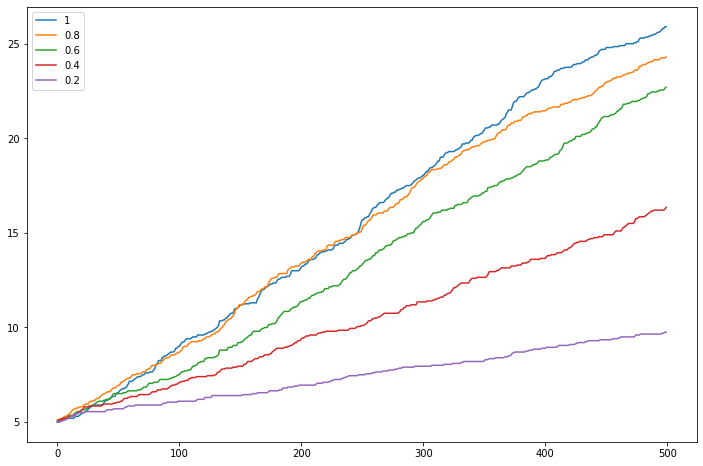

In [127]:
# plot the sampled 5 curves from 0.2 to 1
plt.figure(figsize=(12,8))
plt.plot(list(range(500)),total1,label='1')
plt.plot(list(range(500)),total_08,label='0.8')
plt.plot(list(range(500)),total_06,label='0.6')
plt.plot(list(range(500)),total_04,label='0.4')
plt.plot(list(range(500)),total_02,label='0.2')
plt.legend()